In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
from sklearn import preprocessing
import pandas as pd
import matplotlib.pyplot as plt

Init Plugin
Init Graph Optimizer
Init Kernel


In [2]:
def deal_file(file):
    data_list_text = file.readlines()
    data_list = []
    for i in data_list_text:
        data_list.append(list(map(float, i.split(','))))
    data_list = np.asarray(data_list, float)
    return data_list

In [3]:
data=deal_file(open('in.txt'))
label=deal_file(open('out.txt'))
test=deal_file(open('test.txt'))

testsplit=np.split(test,[0,13],axis=1)
testx=testsplit[1]
testy=testsplit[2]
print('prompt: data load finished')

prompt: data load finished


In [14]:
def scale(x):
    return preprocessing.StandardScaler().fit_transform(x)

In [15]:
data=scale(data)
label=scale(label)
testx=scale(testx)
testy=scale(testy)

In [16]:
model=tf.keras.Sequential([
    keras.layers.Dense(32,input_shape=([13]),activation='relu'),
    keras.layers.Dense(64,activation='relu'),
    keras.layers.Dense(64,activation='relu'),
    keras.layers.Dense(1)
])

In [17]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 32)                448       
_________________________________________________________________
dense_5 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_6 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 65        
Total params: 6,785
Trainable params: 6,785
Non-trainable params: 0
_________________________________________________________________


In [18]:
class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 100 == 0: print('')
    print('.', end='')
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

In [19]:
model.compile(optimizer=tf.keras.optimizers.RMSprop(0.001),loss='mse',metrics=['mae','mse'])
history=model.fit(
    data,label,epochs=200,
    validation_split = 0.2,
    verbose=0,
    callbacks=[early_stop,PrintDot()]
)

2021-09-30 19:02:33.316496: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-09-30 19:02:33.667934: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.



................................

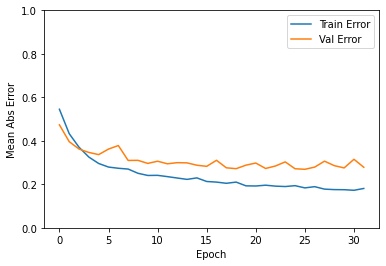

In [20]:
def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Abs Error')
  plt.plot(hist['epoch'], hist['mae'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mae'],
           label = 'Val Error')
  plt.ylim([0,1])
  plt.legend()
  plt.show()

plot_history(history)

In [21]:
predict=model.predict(testx).flatten()

2021-09-30 19:02:44.267718: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


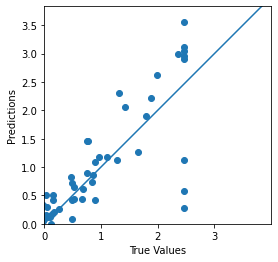

In [31]:
plt.scatter(testy, predict)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([-100, 100], [-100, 100])

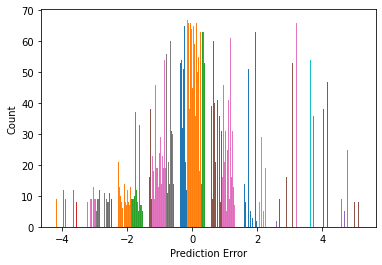

In [26]:
error = predict - testy
plt.hist(error)
plt.xlabel("Prediction Error")
_ = plt.ylabel("Count")

In [1]:
!which python3

/Users/zhaoziyi/opt/anaconda3/envs/tf-metal-venv/bin/python3
